In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [22]:
import pandas as pd
import numpy as np

In [89]:
btc = pd.read_csv("data/BTC-USD.csv",
             parse_dates=["Date"],
                 index_col=["Date"])

btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [115]:
btc["2014-09"]

C:\Users\Sykkuno\AppData\Local\Temp\ipykernel_12852\706006884.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  btc["2014-09"]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400


In [5]:
`btc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566
2023-01-06,16836.472656,16991.994141,16716.421875,16951.968750,16951.968750,14413662913
2023-01-07,16948.787109,16975.017578,16929.478516,16950.582031,16950.582031,13550465024


In [6]:
import seaborn as sns

<AxesSubplot: xlabel='Date', ylabel='Open'>

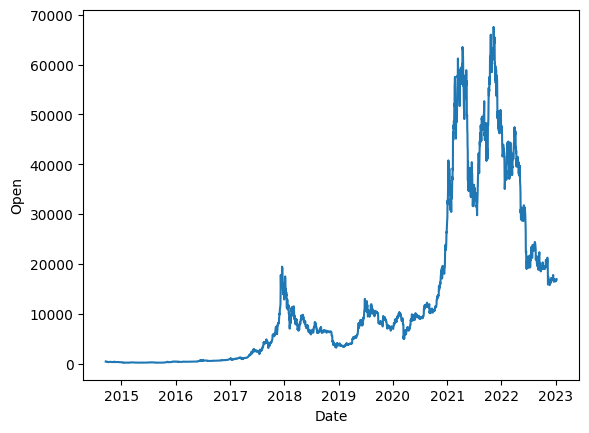

In [7]:
sns.lineplot(btc["Open"])

<AxesSubplot: xlabel='Date', ylabel='Close'>

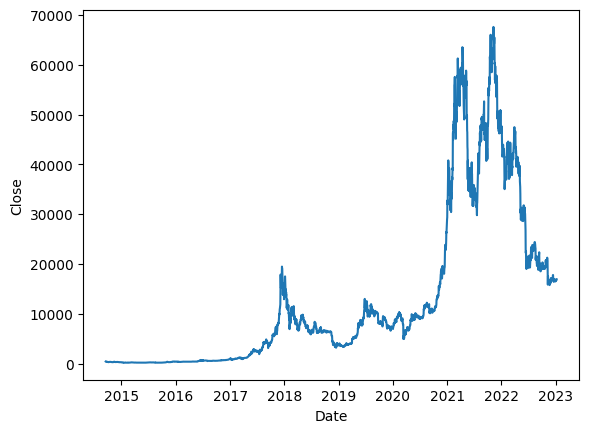

In [8]:
sns.lineplot(btc["Close"])

<AxesSubplot: xlabel='Date', ylabel='High'>

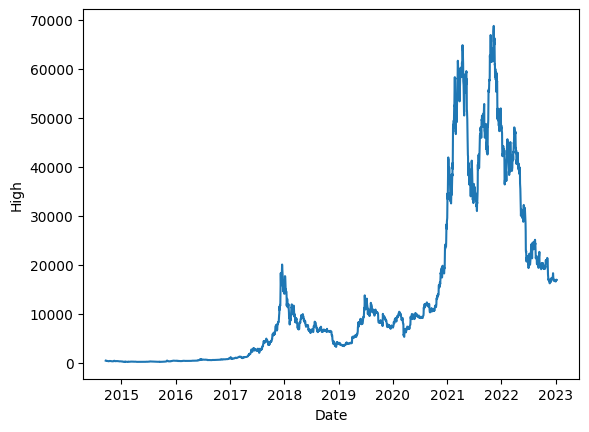

In [9]:
sns.lineplot(btc["High"])

<AxesSubplot: xlabel='Date', ylabel='Close'>

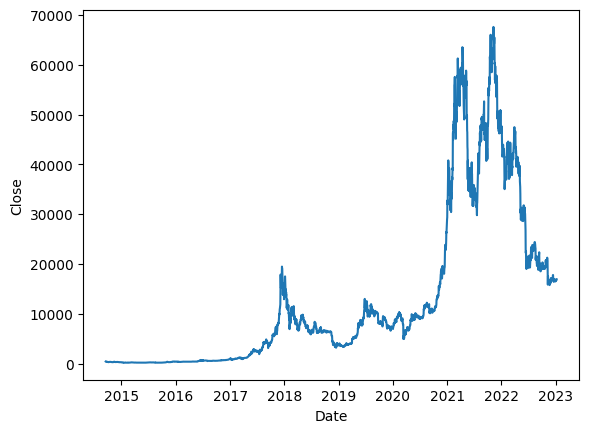

In [10]:
sns.lineplot(btc["Close"])

<AxesSubplot: xlabel='Date', ylabel='Volume'>

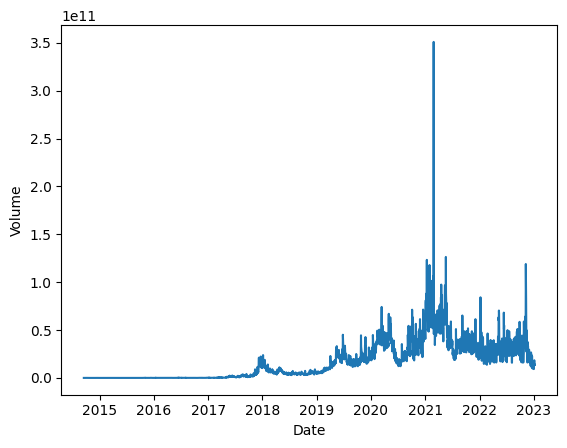

In [11]:
sns.lineplot(btc["Volume"])

In [356]:
WINDOW = 7
HORIZON = 1 

In [357]:
btc.shape

(3035, 6)

In [358]:
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # Block contains stack of 4 fully connected layers each has ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

    def call(self, inputs): # the call method is what runs when the layer is called 
        x = inputs 
        for layer in self.hidden: # pass inputs through each hidden layer 
              x = layer(x)
        theta = self.theta_layer(x) 
        # Output the backcast and forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

In [360]:
# dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW, 
#                                        theta_size=WINDOW + HORIZON,
#                                        horizon=HORIZON,
#                                        n_neurons=128,
#                                        n_layers=4)

# dummy_inputs = tf.expand_dims(tf.range(WINDOW) + 1, axis=0) 
# dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [361]:
# backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# print(f"Backcast: {tf.squeeze(backcast.numpy())}")
# print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.6838308   0.43125778 -0.06367834  0.3976934  -0.5576977  -1.0737925
  0.19940567]
Forecast: -0.34451380372047424


In [362]:
btc_data = pd.DataFrame(btc["Close"].rename("Price"))
btc_data.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [363]:
# Block reward values
block_reward_1, block_reward_2, block_reward_3, block_reward_4 = 50, 25, 12.5, 6.25 

# Block reward dates (datetime form of the above date stamps)
block_reward_1_datetime = np.datetime64("2014-09-17")
block_reward_2_datetime = np.datetime64("2015-11-28")
block_reward_3_datetime = np.datetime64("2017-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

block_reward_1_days = (block_reward_2_datetime - btc_data.index[0]).days
block_reward_2_days = (block_reward_3_datetime - btc_data.index[0]).days
block_reward_3_days = (block_reward_4_datetime - btc_data.index[0]).days

In [364]:
bitcoin_prices_block = btc_data.copy()
bitcoin_prices_block["Block Reward"] = None

bitcoin_prices_block.iloc[:block_reward_1_days, -1] = block_reward_1
bitcoin_prices_block.iloc[block_reward_1_days : block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days : block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days :, -1] = block_reward_4
bitcoin_prices_block

,Price,Block Reward
Date,,
2014-09-17,457.334015,50
2014-09-18,424.440002,50
2014-09-19,394.795990,50
2014-09-20,408.903992,50
2014-09-21,398.821014,50
...,...,...
2023-01-03,16679.857422,6.25
2023-01-04,16863.238281,6.25
2023-01-05,16836.736328,6.25


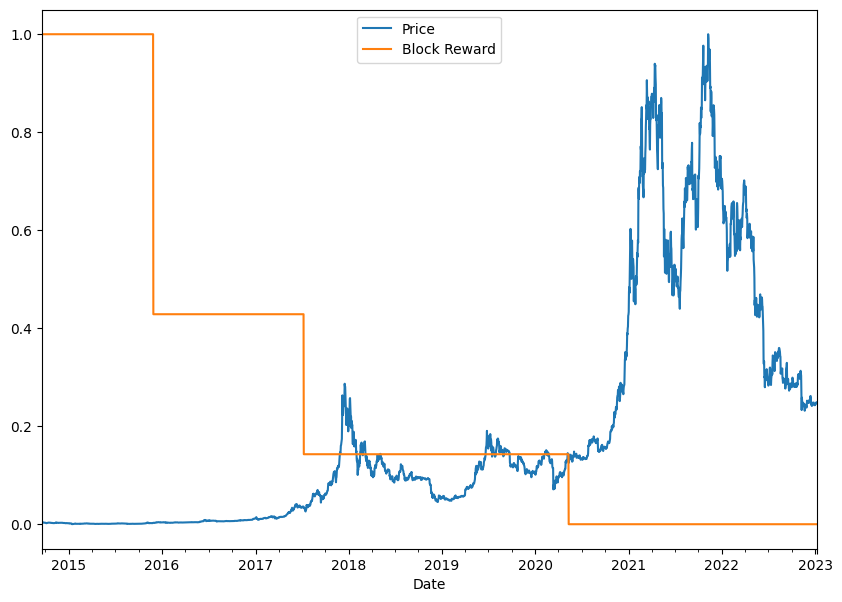

In [365]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "Block Reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [366]:
bitcoin_prices_window = bitcoin_prices_block.copy()
bitcoin_prices_window.head()

,Price,Block Reward
Date,,
2014-09-17,457.334015,50
2014-09-18,424.440002,50
2014-09-19,394.795990,50
2014-09-20,408.903992,50
2014-09-21,398.821014,50


In [367]:
for i in range(WINDOW):
    bitcoin_prices_window[f"Pice {i+1}"] = bitcoin_prices_window["Price"].shift(periods=i+1)
bitcoin_prices_window.head(16)

,Price,Block Reward,Pice 1,Pice 2,Pice 3,Pice 4,Pice 5,Pice 6,Pice 7
Date,,,,,,,,,
2014-09-17,457.334015,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,50,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,50,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,50,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,50,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,50,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,50,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,50,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,50,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [368]:
X = bitcoin_prices_window.dropna().drop(["Price"], axis=1).astype("float32")
Y = bitcoin_prices_window.dropna()["Price"].astype("float32")
X.shape, Y.shape

((3028, 8), (3028,))

In [369]:
def create_train_test_splits(windows, horizons, test_split=0.2):
    """ 
    Return train_windows, test_windows, train_horizons, test_horizons
    """
    split_size = int(len(windows) * (1-test_split))
    
    train_windows = windows[: split_size]
    train_labels = horizons[: split_size]
    
    test_windows = windows[split_size :]
    test_labels =horizons[split_size :]
    
    return train_windows, test_windows, train_labels, test_labels

In [370]:
train_windows, test_windows, train_labels, test_labels = create_train_test_splits(X, Y, test_split=0.15)

In [371]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(train_windows)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(train_labels)

test_features_dataset = tf.data.Dataset.from_tensor_slices(test_windows)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(test_labels)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

In [372]:
N_EPOCHS = 5000 
N_NEURONS = 512 
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW * HORIZON + 1 # 1 extra for the Block Reward We introduced
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(8, 9)

In [373]:
%%time
from tensorflow.keras import layers

tf.random.set_seed(42)

# Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

backcast, forecast = nbeats_block_layer(stack_input)
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)):

  # Use the NBeatsBlock to calculate the backcast as well as block forecast
      backcast, block_forecast = NBeatsBlock(
          input_size=INPUT_SIZE,
          theta_size=THETA_SIZE,
          horizon=HORIZON,
          n_neurons=N_NEURONS,
          n_layers=N_LAYERS,
          name=f"NBeatsBlock_{i}"
      )(residuals)

  # Create the double residual stacking
      residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
      forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# Put the stack model together
model = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                       )

# Compile with MAE loss and Adam optimizer
model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# Fitting THe Model
model.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

Epoch 1/5000
3/3 [==============================] - 7s 692ms/step - loss: 94943.5156 - mae: 94943.5156 - mse: 18907185152.0000 - val_loss: 13778.9980 - val_mae: 13778.9980 - val_mse: 228927072.0000 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 84ms/step - loss: 12993.5781 - mae: 12993.5781 - mse: 353540960.0000 - val_loss: 18647.7480 - val_mae: 18647.7480 - val_mse: 416276704.0000 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 138ms/step - loss: 10296.8818 - mae: 10296.8818 - mse: 595179776.0000 - val_loss: 2233.2844 - val_mae: 2233.2844 - val_mse: 8066689.5000 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 78ms/step - loss: 2226.7532 - mae: 2226.7532 - mse: 14936348.0000 - val_loss: 11605.7354 - val_mae: 11605.7354 - val_mse: 169329520.0000 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 80ms/step - loss: 5938.3413 - mae: 5938.3413 - mse: 97231904.0000 - val_loss: 9127.6484 - val_mae: 9127.6484 - val_m

Epoch 42/5000
3/3 [==============================] - 0s 127ms/step - loss: 427.9840 - mae: 427.9840 - mse: 945121.0625 - val_loss: 836.1929 - val_mae: 836.1929 - val_mse: 1546666.2500 - lr: 0.0010
Epoch 43/5000
3/3 [==============================] - 0s 77ms/step - loss: 438.5748 - mae: 438.5748 - mse: 1065814.2500 - val_loss: 982.8696 - val_mae: 982.8696 - val_mse: 2057834.8750 - lr: 0.0010
Epoch 44/5000
3/3 [==============================] - 0s 76ms/step - loss: 382.2245 - mae: 382.2245 - mse: 797116.1250 - val_loss: 889.3480 - val_mae: 889.3480 - val_mse: 1670703.1250 - lr: 0.0010
Epoch 45/5000
3/3 [==============================] - 0s 76ms/step - loss: 324.9822 - mae: 324.9822 - mse: 636334.3125 - val_loss: 960.2867 - val_mae: 960.2867 - val_mse: 2001920.6250 - lr: 0.0010
Epoch 46/5000
3/3 [==============================] - 0s 76ms/step - loss: 306.5569 - mae: 306.5569 - mse: 546404.5625 - val_loss: 846.0851 - val_mae: 846.0851 - val_mse: 1606865.0000 - lr: 0.0010
Epoch 47/5000
3/3 

Epoch 84/5000
3/3 [==============================] - 0s 75ms/step - loss: 420.6245 - mae: 420.6245 - mse: 881627.3750 - val_loss: 818.6871 - val_mae: 818.6871 - val_mse: 1562832.3750 - lr: 0.0010
Epoch 85/5000
3/3 [==============================] - 0s 76ms/step - loss: 500.6357 - mae: 500.6357 - mse: 1288156.2500 - val_loss: 1083.4421 - val_mae: 1083.4421 - val_mse: 2400684.0000 - lr: 0.0010
Epoch 86/5000
3/3 [==============================] - 0s 78ms/step - loss: 389.6481 - mae: 389.6481 - mse: 829645.9375 - val_loss: 911.6655 - val_mae: 911.6655 - val_mse: 1721668.7500 - lr: 0.0010
Epoch 87/5000
3/3 [==============================] - 0s 75ms/step - loss: 307.8366 - mae: 307.8366 - mse: 568146.4375 - val_loss: 938.0645 - val_mae: 938.0645 - val_mse: 1947710.1250 - lr: 0.0010
Epoch 88/5000
3/3 [==============================] - 0s 85ms/step - loss: 286.9898 - mae: 286.9898 - mse: 490325.1562 - val_loss: 833.5214 - val_mae: 833.5214 - val_mse: 1598672.7500 - lr: 0.0010
Epoch 89/5000
3/3

3/3 [==============================] - 0s 87ms/step - loss: 271.7056 - mae: 271.7056 - mse: 441854.3125 - val_loss: 816.6319 - val_mae: 816.6319 - val_mse: 1533922.0000 - lr: 0.0010
Epoch 126/5000
3/3 [==============================] - 0s 90ms/step - loss: 320.6328 - mae: 320.6328 - mse: 554046.0625 - val_loss: 876.2824 - val_mae: 876.2824 - val_mse: 1766488.5000 - lr: 0.0010
Epoch 127/5000
3/3 [==============================] - 0s 95ms/step - loss: 476.6720 - mae: 476.6720 - mse: 1118382.3750 - val_loss: 930.1241 - val_mae: 930.1241 - val_mse: 1936249.0000 - lr: 0.0010
Epoch 128/5000
3/3 [==============================] - 0s 92ms/step - loss: 432.6684 - mae: 432.6684 - mse: 964159.2500 - val_loss: 920.5223 - val_mae: 920.5223 - val_mse: 1736122.2500 - lr: 0.0010
Epoch 129/5000
3/3 [==============================] - 0s 77ms/step - loss: 345.6348 - mae: 345.6348 - mse: 706053.3125 - val_loss: 982.1151 - val_mae: 982.1151 - val_mse: 2051538.0000 - lr: 0.0010
Epoch 130/5000
3/3 [=========

Epoch 167/5000
3/3 [==============================] - 0s 85ms/step - loss: 383.2648 - mae: 383.2648 - mse: 788702.1250 - val_loss: 892.7242 - val_mae: 892.7242 - val_mse: 1841335.3750 - lr: 0.0010
Epoch 168/5000
3/3 [==============================] - 0s 79ms/step - loss: 385.6324 - mae: 385.6324 - mse: 764862.3125 - val_loss: 861.9291 - val_mae: 861.9291 - val_mse: 1661301.8750 - lr: 0.0010
Epoch 169/5000
3/3 [==============================] - 0s 80ms/step - loss: 324.0817 - mae: 324.0817 - mse: 615957.5000 - val_loss: 982.9548 - val_mae: 982.9548 - val_mse: 2082847.0000 - lr: 0.0010
Epoch 170/5000
3/3 [==============================] - 0s 80ms/step - loss: 305.5277 - mae: 305.5277 - mse: 542688.1875 - val_loss: 825.9693 - val_mae: 825.9693 - val_mse: 1592596.1250 - lr: 0.0010
Epoch 171/5000
3/3 [==============================] - 0s 81ms/step - loss: 276.3313 - mae: 276.3313 - mse: 450959.2812 - val_loss: 843.0328 - val_mae: 843.0328 - val_mse: 1670945.2500 - lr: 0.0010
Epoch 172/5000


3/3 [==============================] - 0s 93ms/step - loss: 274.9775 - mae: 274.9775 - mse: 472568.8438 - val_loss: 808.6636 - val_mae: 808.6636 - val_mse: 1528939.6250 - lr: 1.0000e-04
Epoch 208/5000
3/3 [==============================] - 0s 91ms/step - loss: 274.3271 - mae: 274.3272 - mse: 470534.6250 - val_loss: 806.7120 - val_mae: 806.7120 - val_mse: 1519479.5000 - lr: 1.0000e-04
Epoch 209/5000
3/3 [==============================] - 0s 92ms/step - loss: 273.6534 - mae: 273.6534 - mse: 468794.8125 - val_loss: 805.6874 - val_mae: 805.6874 - val_mse: 1516468.5000 - lr: 1.0000e-04
Epoch 210/5000
3/3 [==============================] - 0s 83ms/step - loss: 272.9193 - mae: 272.9193 - mse: 466917.3750 - val_loss: 804.9694 - val_mae: 804.9694 - val_mse: 1516413.0000 - lr: 1.0000e-04
Epoch 211/5000
3/3 [==============================] - 0s 82ms/step - loss: 272.2135 - mae: 272.2135 - mse: 465216.8125 - val_loss: 804.6205 - val_mae: 804.6205 - val_mse: 1517184.3750 - lr: 1.0000e-04
Epoch 212/

Epoch 248/5000
3/3 [==============================] - 0s 92ms/step - loss: 254.9536 - mae: 254.9536 - mse: 421387.2812 - val_loss: 796.0974 - val_mae: 796.0974 - val_mse: 1478036.2500 - lr: 1.0000e-04
Epoch 249/5000
3/3 [==============================] - 0s 82ms/step - loss: 254.6199 - mae: 254.6199 - mse: 420682.1250 - val_loss: 796.9033 - val_mae: 796.9033 - val_mse: 1481544.8750 - lr: 1.0000e-04
Epoch 250/5000
3/3 [==============================] - 0s 81ms/step - loss: 254.5318 - mae: 254.5318 - mse: 420131.9062 - val_loss: 796.7358 - val_mae: 796.7358 - val_mse: 1481478.3750 - lr: 1.0000e-04
Epoch 251/5000
3/3 [==============================] - 0s 138ms/step - loss: 253.9948 - mae: 253.9948 - mse: 419092.9375 - val_loss: 795.1223 - val_mae: 795.1223 - val_mse: 1474222.0000 - lr: 1.0000e-04
Epoch 252/5000
3/3 [==============================] - 0s 80ms/step - loss: 253.5197 - mae: 253.5197 - mse: 418220.6875 - val_loss: 795.8383 - val_mae: 795.8383 - val_mse: 1477388.7500 - lr: 1.000

Epoch 289/5000
3/3 [==============================] - 0s 84ms/step - loss: 242.0094 - mae: 242.0094 - mse: 390552.0625 - val_loss: 796.1832 - val_mae: 796.1832 - val_mse: 1480558.5000 - lr: 1.0000e-04
Epoch 290/5000
3/3 [==============================] - 0s 81ms/step - loss: 241.6789 - mae: 241.6789 - mse: 389742.1562 - val_loss: 796.2226 - val_mae: 796.2226 - val_mse: 1481102.3750 - lr: 1.0000e-04
Epoch 291/5000
3/3 [==============================] - 0s 82ms/step - loss: 241.7741 - mae: 241.7741 - mse: 389044.7188 - val_loss: 795.8173 - val_mae: 795.8173 - val_mse: 1478406.7500 - lr: 1.0000e-04
Epoch 292/5000
3/3 [==============================] - 0s 94ms/step - loss: 242.3624 - mae: 242.3624 - mse: 389312.6562 - val_loss: 795.9453 - val_mae: 795.9453 - val_mse: 1476407.0000 - lr: 1.0000e-04
Epoch 293/5000
3/3 [==============================] - 0s 80ms/step - loss: 241.9664 - mae: 241.9664 - mse: 388346.2500 - val_loss: 798.1792 - val_mae: 798.1792 - val_mse: 1488575.2500 - lr: 1.0000

Epoch 330/5000
3/3 [==============================] - 0s 81ms/step - loss: 230.3163 - mae: 230.3163 - mse: 363075.8125 - val_loss: 803.7941 - val_mae: 803.7941 - val_mse: 1504742.1250 - lr: 1.0000e-04
Epoch 331/5000
3/3 [==============================] - 0s 83ms/step - loss: 231.2484 - mae: 231.2484 - mse: 362566.5312 - val_loss: 804.6419 - val_mae: 804.6419 - val_mse: 1506065.5000 - lr: 1.0000e-04
Epoch 332/5000
3/3 [==============================] - 0s 83ms/step - loss: 231.8679 - mae: 231.8679 - mse: 363526.0312 - val_loss: 804.4295 - val_mae: 804.4295 - val_mse: 1502828.7500 - lr: 1.0000e-04
Epoch 333/5000
3/3 [==============================] - 0s 83ms/step - loss: 233.0427 - mae: 233.0427 - mse: 363133.8750 - val_loss: 808.7543 - val_mae: 808.7543 - val_mse: 1520178.8750 - lr: 1.0000e-04
Epoch 334/5000
3/3 [==============================] - 0s 82ms/step - loss: 230.7416 - mae: 230.7416 - mse: 361714.3750 - val_loss: 803.9020 - val_mae: 803.9020 - val_mse: 1499997.5000 - lr: 1.0000

Epoch 370/5000
3/3 [==============================] - 0s 84ms/step - loss: 220.7240 - mae: 220.7240 - mse: 340361.4375 - val_loss: 813.3676 - val_mae: 813.3676 - val_mse: 1524986.3750 - lr: 1.0000e-05
Epoch 371/5000
3/3 [==============================] - 0s 83ms/step - loss: 220.6668 - mae: 220.6668 - mse: 340313.0625 - val_loss: 813.1985 - val_mae: 813.1985 - val_mse: 1524161.2500 - lr: 1.0000e-05
Epoch 372/5000
3/3 [==============================] - 0s 77ms/step - loss: 220.5877 - mae: 220.5877 - mse: 340222.1250 - val_loss: 813.2509 - val_mae: 813.2509 - val_mse: 1524418.3750 - lr: 1.0000e-05
Epoch 373/5000
3/3 [==============================] - 0s 78ms/step - loss: 220.5566 - mae: 220.5566 - mse: 340158.7188 - val_loss: 813.4857 - val_mae: 813.4857 - val_mse: 1525234.3750 - lr: 1.0000e-05
Epoch 374/5000
3/3 [==============================] - 0s 80ms/step - loss: 220.4810 - mae: 220.4810 - mse: 340088.1250 - val_loss: 813.2725 - val_mae: 813.2725 - val_mse: 1524451.0000 - lr: 1.0000

Epoch 411/5000
3/3 [==============================] - 0s 98ms/step - loss: 219.0703 - mae: 219.0703 - mse: 337411.7188 - val_loss: 814.7061 - val_mae: 814.7061 - val_mse: 1528657.1250 - lr: 1.0000e-05
Epoch 412/5000
3/3 [==============================] - 0s 80ms/step - loss: 219.3062 - mae: 219.3062 - mse: 337243.7188 - val_loss: 815.3881 - val_mae: 815.3881 - val_mse: 1530978.8750 - lr: 1.0000e-05
Epoch 413/5000
3/3 [==============================] - 0s 81ms/step - loss: 218.9888 - mae: 218.9888 - mse: 337206.7812 - val_loss: 814.3224 - val_mae: 814.3224 - val_mse: 1527138.8750 - lr: 1.0000e-05
Epoch 414/5000
3/3 [==============================] - 0s 79ms/step - loss: 219.5354 - mae: 219.5354 - mse: 337499.8438 - val_loss: 813.7574 - val_mae: 813.7574 - val_mse: 1524790.6250 - lr: 1.0000e-05
Epoch 415/5000
3/3 [==============================] - 0s 78ms/step - loss: 219.0029 - mae: 219.0029 - mse: 337108.6562 - val_loss: 815.3120 - val_mae: 815.3120 - val_mse: 1530571.5000 - lr: 1.0000

Epoch 452/5000
3/3 [==============================] - 0s 87ms/step - loss: 217.6951 - mae: 217.6951 - mse: 334129.6562 - val_loss: 816.5456 - val_mae: 816.5456 - val_mse: 1533207.6250 - lr: 1.0000e-05
Epoch 453/5000
3/3 [==============================] - 0s 77ms/step - loss: 217.8635 - mae: 217.8635 - mse: 334238.2188 - val_loss: 816.2489 - val_mae: 816.2489 - val_mse: 1532244.8750 - lr: 1.0000e-05
Epoch 454/5000
3/3 [==============================] - 0s 77ms/step - loss: 217.7048 - mae: 217.7048 - mse: 334013.5000 - val_loss: 816.9683 - val_mae: 816.9683 - val_mse: 1534784.6250 - lr: 1.0000e-05
Epoch 455/5000
3/3 [==============================] - 0s 83ms/step - loss: 217.5178 - mae: 217.5178 - mse: 333975.3750 - val_loss: 816.4661 - val_mae: 816.4661 - val_mse: 1533191.6250 - lr: 1.0000e-05
Epoch 456/5000
3/3 [==============================] - 0s 90ms/step - loss: 217.5257 - mae: 217.5257 - mse: 333823.3438 - val_loss: 816.5883 - val_mae: 816.5883 - val_mse: 1533505.2500 - lr: 1.0000

In [374]:
model.evaluate(test_dataset)

1/1 [==============================] - 0s 94ms/step - loss: 794.1437 - mae: 794.1437 - mse: 1470808.5000


[794.1436767578125, 794.1436767578125, 1470808.5]

In [375]:
y_preds = model.predict(test_dataset)
y_preds[:10]

1/1 [==============================] - 1s 937ms/step


array([[54388.344],
       [54745.16 ],
       [57287.824],
       [56259.79 ],
       [57148.652],
       [57055.934],
       [61365.27 ],
       [61280.664],
       [61777.336],
       [61831.54 ]], dtype=float32)

In [376]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanAbsoluteScaledError
import numpy as np
def all_metrics(y_true, y_preds, y_train):
    """y_true, y_preds, y_train"""
    m = {}
    m["MAE"] = mean_absolute_error(y_true, y_preds)
    m["MSE"] = np.sqrt(mean_absolute_error(y_true, y_preds))
    m["MAPE"] = mean_absolute_percentage_error(y_true, y_preds)
    y_train = pd.DataFrame(y_train)
    y_preds = pd.DataFrame(y_preds)
    mase = MeanAbsoluteScaledError()
    m["MASE"] = mase(y_true, y_preds, y_train=y_train)
    return m

In [379]:
model_evaluation = all_metrics(test_labels, y_preds, test_horizons)    
model_evaluation

C:\Users\Sykkuno\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\performance_metrics\forecasting\_classes.py:411: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
C:\Users\Sykkuno\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\performance_metrics\forecasting\_classes.py:422: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


{'MAE': 794.1437,
 'MSE': 28.180555,
 'MAPE': 0.023224948,
 'MASE': 1.0303351249527113}

In [380]:
def plot_data_time(y_true, y_preds):
    import matplotlib.pyplot as plt
    import seaborn as sns
    y_preds = tf.squeeze(y_preds)
    temp = {"Actual": y_true,
           "Predicted": y_preds}
    df = pd.DataFrame(temp)
    sns.lineplot(df)
    plt.xticks(rotation=45);    

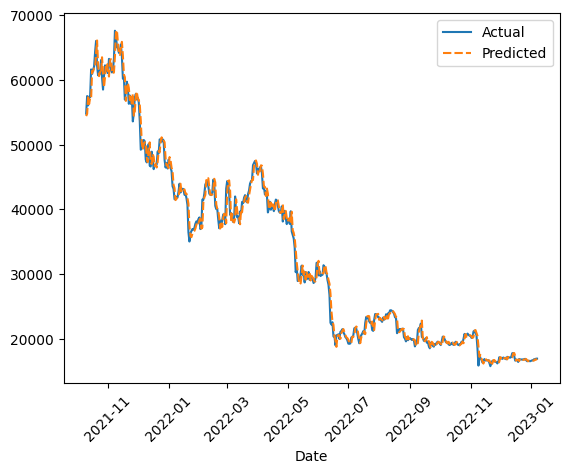

In [381]:
plot_data_time(test_labels, y_preds)